In [10]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [11]:
#Reading the dataset
df = pd.read_csv('Pokemon.csv', index_col=0, encoding='latin1')

In [12]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


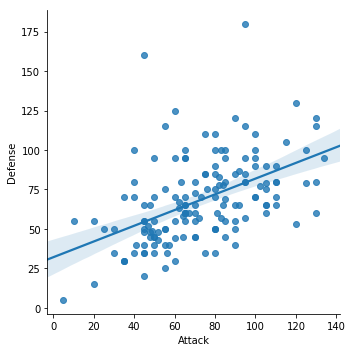

In [17]:
#scatterplot with regression lines
sns.lmplot(x='Attack', y='Defense', data=df);

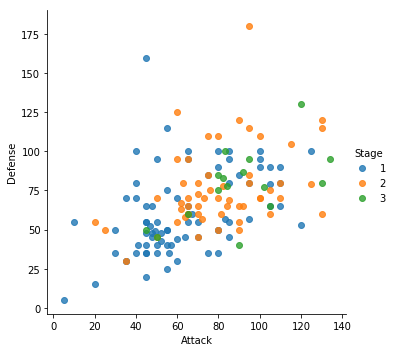

In [16]:
#scatterplot without regression lines arguments
sns.lmplot(x='Attack', y='Defense', data=df,
          fit_reg=False, #removes the regression line
          hue='Stage'); #color by evolution stage

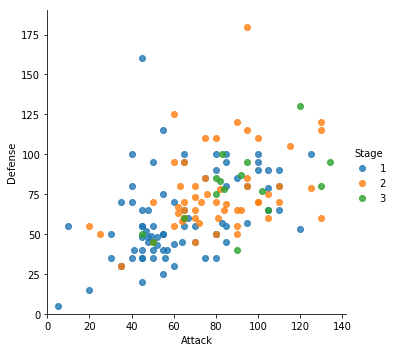

In [20]:
#customization using matplotlib by setting x and y limits of the current axes
sns.lmplot(x='Attack', y='Defense', data=df,
          fit_reg=False,
          hue='Stage'); 

#tweaks in matplotlib
plt.ylim(0, None)
plt.xlim(0, None);


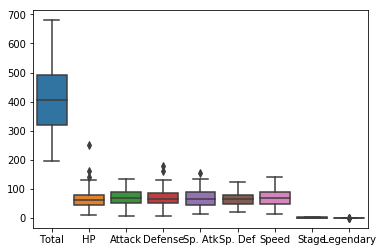

In [22]:
#boxplot
sns.boxplot(data=df);

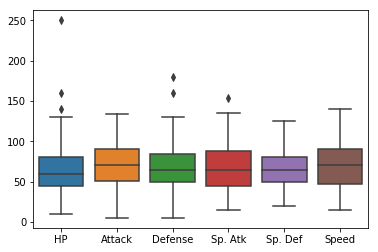

In [23]:
#pre-formatting the df using pandas
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)

#new boxplot
sns.boxplot(data=stats_df)

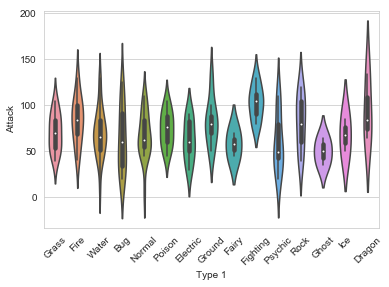

In [32]:
#Violin plots- We can visualize the distribution of attack by pokemon's primary type
sns.set_style('whitegrid')

violin = sns.violinplot(x='Type 1', y='Attack', data=df)

violin.set_xticklabels(chart.get_xticklabels(), rotation=45);

In [33]:
#create new color palettes
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

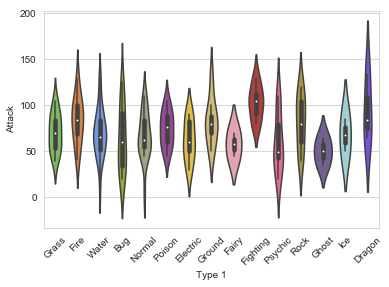

In [44]:
#plotting the violin plot again
violin = sns.violinplot(x='Type 1', y='Attack', data=df,
                       palette=pkmn_type_colors) #sets the color palette

violin.set_xticklabels(violin.get_xticklabels(), rotation=45);

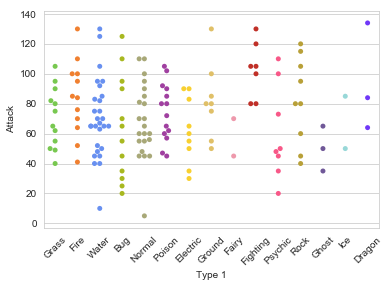

In [43]:
#Swarmplot - shows each point, while stacking those with similar values
swarm = sns.swarmplot(x='Type 1', y='Attack', data=df,
                       palette=pkmn_type_colors) #sets the color palette

swarm.set_xticklabels(swarm.get_xticklabels(), rotation=45);

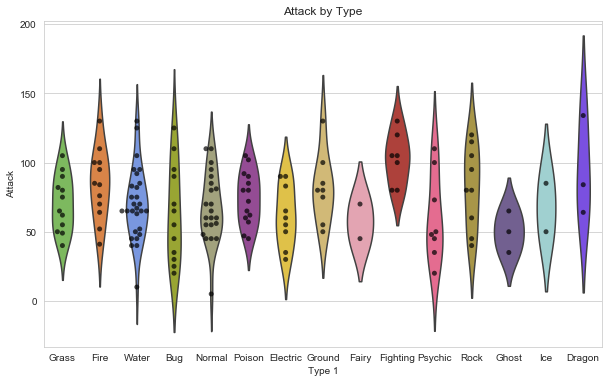

In [46]:
#overlaying the swarm and violin plots
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
plt.title('Attack by Type');

In [47]:
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


In [49]:
#Melt the dataframe- to melt all the stats into a single column
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat") # Name of melted variable
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


In [50]:
#comparing the shapes of the stats_df and melted_df
print( stats_df.shape )
print( melted_df.shape )

(151, 9)
(906, 5)


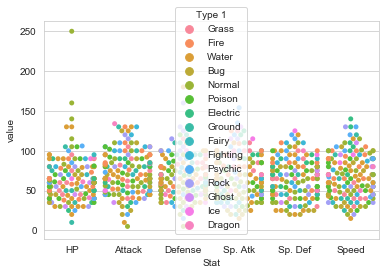

In [52]:
#swarmplot with melted_df
sns.swarmplot(x='Stat', y='value', data=melted_df, 
              hue='Type 1');

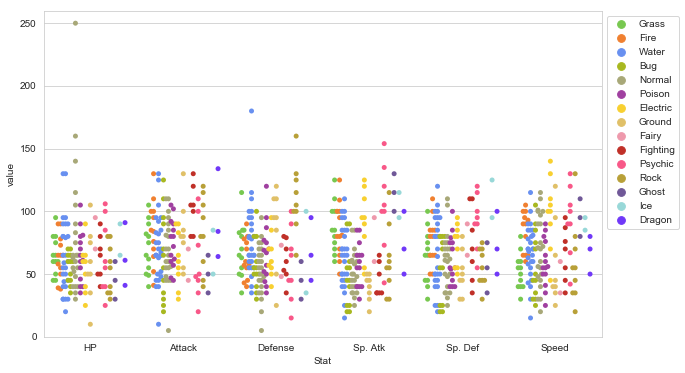

In [68]:
'''
Making the swarm chart more readable
How do we do it?
1. Enlarge the plot.
2. Separate points by hue using the argument dodge=True (earlier split=True).
3. Use our custom Pokemon color palette.
4. Adjust the y-axis limits to end at 0.
5. Place the legend to the right.
'''
# 1. Enlarge the plot
plt.figure(figsize=(10,6))
 
sns.swarmplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Type 1', 
              dodge=True, # 2. Separate points by hue (earlier used to be split=True)
              palette=pkmn_type_colors) # 3. Use Pokemon palette
 
# 4. Adjust the y-axis
plt.ylim(0, 260)
 
# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2);

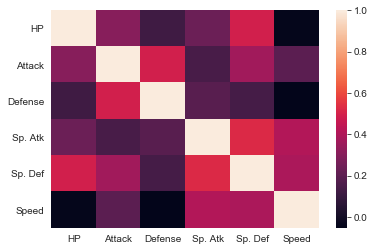

In [59]:
#Heatmap - viz. of matrix like data

#calculate the correlations
corr = stats_df.corr()

sns.heatmap(corr);



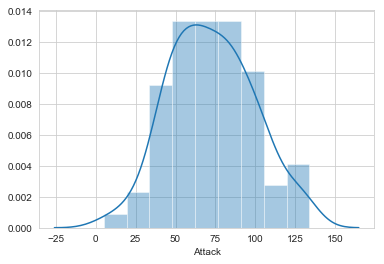

In [61]:
#Histogram aka distribution plot- distribution of numeric variables
sns.distplot(df.Attack);

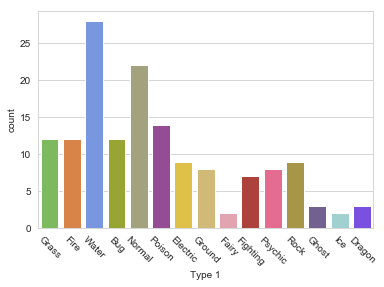

In [63]:
#Bar Plot aka countplot- distributions of categorical variables
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45);


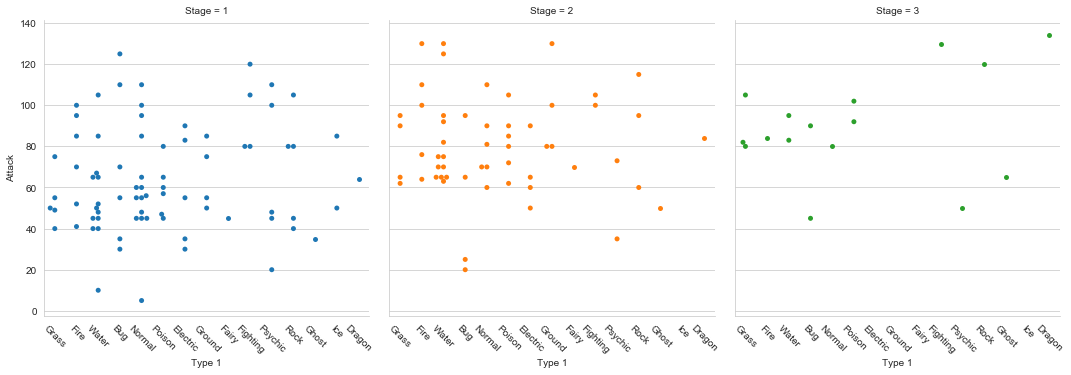

In [66]:
#Factor plot- easy to separate plots by categorical classes
g = sns.catplot(x='Type 1',  #earlier it used to be sns.factorplot
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
 
g.set_xticklabels(rotation=-45);

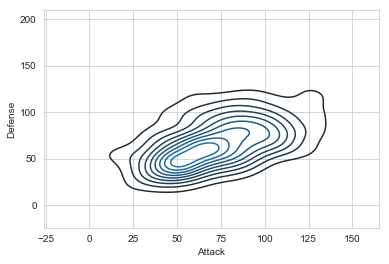

In [70]:
#Density plot- display the distribution between two variables
sns.kdeplot(df.Attack, df.Defense);

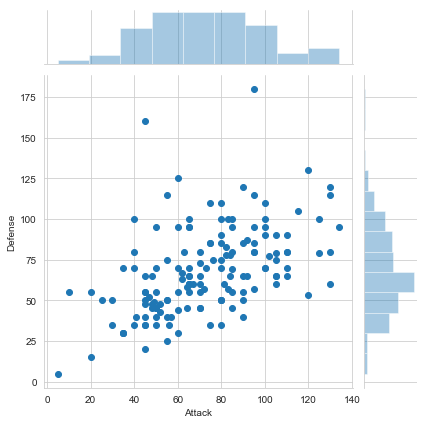

In [71]:
#Joint distribution plot- combine info from scatter plots and histograms to give you detailed info for bi-variate distributions
sns.jointplot(x='Attack', y='Defense', data=df);